In [34]:
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [52]:
# run this to generate the csv file
data = [
    [1, 7], [1, 17], [1, 21], [1, 46], [1, 71], [5, 6], [5, 23], [6, 22],
    [7, 12], [7, 15], [11, 172], [12, 17], [17, 20], [17, 76], [17, 76],
    [21, 25], [22, 24], [23, 24], [24, 44], [25, 57], [26, 40], [30, 35],
    [31, 35], [35, 38], [35, 44], [35, 54], [39, 41], [39, 48], [39, 57],
    [40, 47], [41, 46], [41, 57], [41, 75], [49, 55], [49, 58], [55, 56],
    [56, 69], [57, 71], [57, 71], [57, 76], [58, 59], [58, 69], [59, 82],
    [61, 71], [62, 71], [64, 71], [66, 71], [69, 84], [71, 75], [72, 73],
    [72, 92], [72, 93], [76, 80], [76, 81], [76, 81], [77, 103], [82, 86],
    [88, 90], [90, 92], [93, 96], [94, 96], [96, 97], [103, 119], [109, 113],
    [109, 119], [113, 115], [119, 123], [123, 125], [125, 130], [130, 132],
    [132, 137], [133, 143], [137, 176], [141, 142], [155, 157], [155, 158],
    [155, 161], [155, 176], [159, 185], [161, 166], [166, 170], [170, 172],
    [177, 188], [188, 189], [1, 2], [1, 3], [1, 4], [5, 2], [6, 3], [7, 8],
    [7, 9], [7, 10], [7, 11], [12, 13], [12, 14], [15, 16], [17, 18], [17, 19],
    [25, 26], [26, 27], [26, 28], [26, 29], [26, 30], [31, 32], [31, 32],
    [31, 34], [35, 36], [35, 37], [39, 40], [41, 42], [41, 43], [44, 45],
    [49, 50], [49, 51], [49, 52], [49, 53], [57, 58], [61, 60], [62, 63],
    [64, 65], [66, 67], [66, 68], [69, 70], [71, 72], [73, 74], [76, 77],
    [77, 78], [78, 79], [82, 83], [85, 84], [87, 86], [89, 88], [91, 90],
    [94, 95], [94, 102], [97, 98], [97, 99], [97, 100], [97, 101], [103, 104],
    [104, 105], [104, 107], [105, 106], [105, 108], [109, 110], [110, 111],
    [110, 112], [113, 114], [115, 116], [116, 118], [117, 118], [119, 120],
    [120, 121], [120, 122], [123, 124], [125, 126], [125, 127], [126, 128],
    [127, 129], [130, 131], [132, 133], [133, 134], [134, 135], [134, 136],
    [137, 138], [137, 139], [138, 140], [139, 140], [139, 141], [143, 144],
    [143, 145], [143, 146], [143, 147], [144, 148], [146, 152], [147, 149],
    [148, 152], [149, 153], [150, 153], [151, 153], [152, 153], [152, 154],
    [157, 156], [158, 159], [159, 160], [161, 163], [163, 162], [162, 164],
    [163, 165], [166, 167], [167, 168], [167, 169], [167, 171], [172, 173],
    [173, 174], [173, 175], [177, 176], [188, 178], [188, 179], [188, 180],
    [188, 181], [188, 182], [188, 183], [189, 184], [185, 186], [185, 187],
]

csv_file = "transmission_lines.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)
print(f"CSV file '{csv_file}' created successfully!")

CSV file 'transmission_lines.csv' created successfully!


0.011491637273865058
202


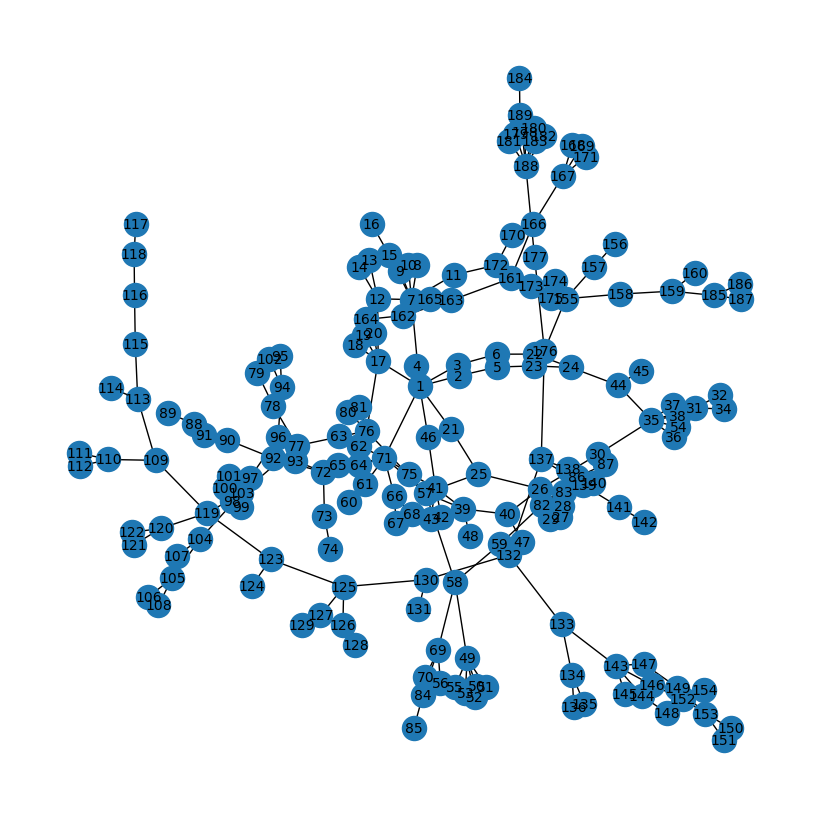

In [54]:
# run this to generate the visualization of the network
file_path = "transmission_lines.csv" 
df = pd.read_csv("transmission_lines.csv") 
G = nx.Graph() 
G.add_edges_from(data)
plt.figure(figsize=(8, 8))
nx.draw(G,with_labels=True, node_size=300, font_size=10)

dc = nx.degree_centrality(G)
average_dc = np.mean(list(dc.values()))
print(average_dc)
print(len(G.edges()))
plt.show()

The average degree centrality of this network is 0.011491637273865058
The degree distribution of the network is: {0: 0, 1: 87, 2: 42, 3: 34, 4: 12, 5: 3, 6: 5, 7: 2, 8: 3}


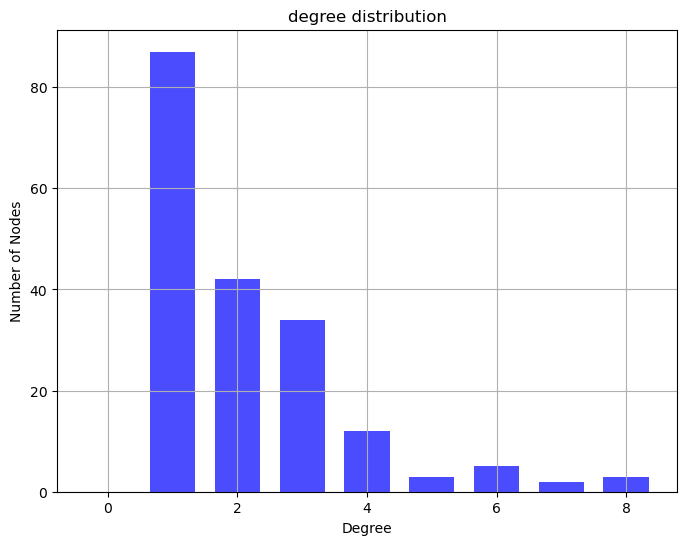

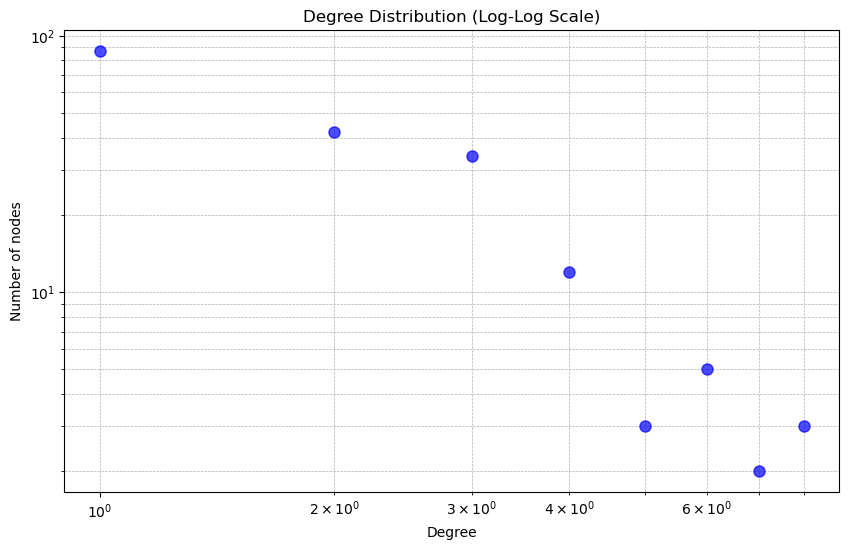

In [55]:
# explore the degree centrality and degree distribution
dc = nx.degree_centrality(G)
average_dc = np.mean(list(dc.values()))
print(f"The average degree centrality of this network is {average_dc}")

def degree_distribution(G, title, plot=True, log = False):
    degrees = [d for n, d in G.degree()]
    degree_counts = np.bincount(degrees)
    degrees = np.arange(len(degree_counts))

    if plot:
        plt.figure(figsize=(8, 6))
        plt.bar(degrees, degree_counts, width=0.7, color='blue', alpha=0.7)
        plt.title(title)
        plt.xlabel('Degree')
        plt.ylabel('Number of Nodes')
        plt.grid()
    if log:
        plt.figure(figsize=(10, 6))
        plt.loglog(degrees, degree_counts, 'bo', markersize=8, alpha=0.7)
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
        plt.title('Degree Distribution (Log-Log Scale)')
        plt.grid(True, which="both", linestyle='--', linewidth=0.5)

    return dict(zip(degrees, degree_counts))

degree_counts = degree_distribution(G, f'degree distribution')
degree_counts = degree_distribution(G, f'degree distribution', False, True)
print(f"The degree distribution of the network is: {degree_counts}")


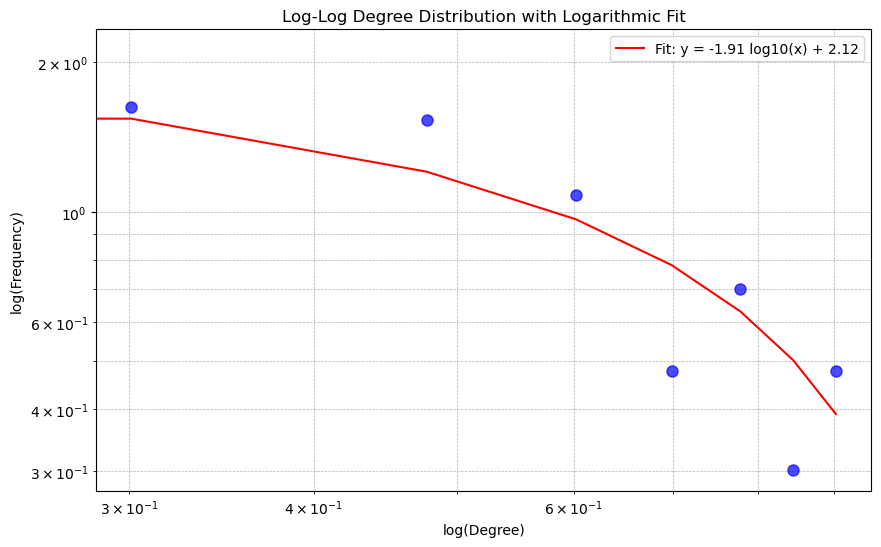

In [56]:
def log_model(x, a, b):
    return a * np.log10(x) + b

# fit a line to the log-log plot
degree_data = degree_distribution(G, f'degree distribution', False)
degrees = np.array(list(degree_data.keys()))
counts = np.array(list(degree_data.values()))
valid_indices = (degrees > 0) & (counts > 0)
filtered_degrees = degrees[valid_indices]
filtered_counts = counts[valid_indices]

popt, pcov = curve_fit(log_model, filtered_degrees, np.log10(filtered_counts))
a, b = popt
fitted_log_counts = log_model(filtered_degrees, a, b)

plt.figure(figsize=(10, 6))
plt.loglog(np.log10(filtered_degrees), np.log10(filtered_counts), 'bo', markersize=8, alpha=0.7)
plt.plot(np.log10(filtered_degrees), fitted_log_counts, color='red', label=f'Fit: y = {a:.2f} log10(x) + {b:.2f}')
plt.xlabel('log(Degree)')
plt.ylabel('log(Frequency)')
plt.title('Log-Log Degree Distribution with Logarithmic Fit')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()